<a href="https://colab.research.google.com/github/ronnyboi/Data_Analytics/blob/main/Data%20Analysis%20on%20Rape%20assaults/Ron_Program_Rapes_Assaults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis on Rape assaults

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sb
import scipy.stats as stats

In [ ]:
df = pd.read_csv('Rapes_Assaults.csv',  encoding='utf-8')
df.head(10)

,States/UTs,Rape - 2015,Rape - 2016,Assaults (molestation) - 2015,Assaults (molestation) - 2016,Murder (women) - 2015,Murder (women) - 2016
0,Andhra Pradesh,1027,994,4616,4829,428,411
1,Arunachal Pradesh,71,92,101,109,9,11
2,Assam,1733,1779,4293,3378,185,220
3,Bihar,1041,1008,198,324,340,318
4,Chhattisgarh,1560,1626,1868,1770,338,347
5,Goa,86,61,150,143,11,16
6,Gujarat,503,982,1164,1224,269,288
7,Haryana,1070,1187,1886,1860,197,226
8,Himachal Pradesh,244,252,434,410,25,28
9,Jammu & Kashmir,296,256,1343,1235,19,24


In [ ]:
df.shape

(39, 7)

In [ ]:
df.describe() 

,Rape - 2015,Rape - 2016,Assaults (molestation) - 2015,Assaults (molestation) - 2016,Murder (women) - 2015,Murder (women) - 2016
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,2665.461538,2995.923077,6340.153846,6518.923077,637.769231,648.384615
std,7360.679516,8308.585431,17515.807646,18191.159493,1806.351811,1838.880947
min,0.000000,5.000000,5.000000,1.000000,0.000000,0.000000
25%,71.500000,80.000000,89.500000,73.500000,11.500000,12.000000
50%,589.000000,982.000000,1163.000000,1025.000000,137.000000,141.000000
75%,1646.500000,1717.500000,4941.000000,4256.500000,423.000000,379.000000
max,34651.000000,38947.000000,82422.000000,84746.000000,8291.000000,8429.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   States/UTs                     39 non-null     object
 1   Rape - 2015                    39 non-null     int64 
 2   Rape - 2016                    39 non-null     int64 
 3   Assaults (molestation) - 2015  39 non-null     int64 
 4   Assaults (molestation) - 2016  39 non-null     int64 
 5   Murder (women) - 2015          39 non-null     int64 
 6   Murder (women) - 2016          39 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.3+ KB


In [ ]:
df.isnull().sum()

States/UTs                       0
Rape - 2015                      0
Rape - 2016                      0
Assaults (molestation) - 2015    0
Assaults (molestation) - 2016    0
Murder (women) - 2015            0
Murder (women) - 2016            0
dtype: int64

# Data Pre processing

In [ ]:
df=df.drop(['States/UTs'], axis = 1) 
df.head()

,Rape - 2015,Rape - 2016,Assaults (molestation) - 2015,Assaults (molestation) - 2016,Murder (women) - 2015,Murder (women) - 2016
0,1027,994,4616,4829,428,411
1,71,92,101,109,9,11
2,1733,1779,4293,3378,185,220
3,1041,1008,198,324,340,318
4,1560,1626,1868,1770,338,347


# Covariance

In [ ]:
covariance = df.cov(min_periods=None)
covariance

,Rape - 2015,Rape - 2016,Assaults (molestation) - 2015,Assaults (molestation) - 2016,Murder (women) - 2015,Murder (women) - 2016
Rape - 2015,5.417960e+07,6.110493e+07,1.285707e+08,1.334227e+08,1.318593e+07,1.341275e+07
Rape - 2016,6.110493e+07,6.903259e+07,1.451404e+08,1.507660e+08,1.491256e+07,1.517104e+07
Assaults (molestation) - 2015,1.285707e+08,1.451404e+08,3.068035e+08,3.183734e+08,3.146212e+07,3.200546e+07
Assaults (molestation) - 2016,1.334227e+08,1.507660e+08,3.183734e+08,3.309183e+08,3.272028e+07,3.328092e+07
Murder (women) - 2015,1.318593e+07,1.491256e+07,3.146212e+07,3.272028e+07,3.262907e+06,3.320469e+06
Murder (women) - 2016,1.341275e+07,1.517104e+07,3.200546e+07,3.328092e+07,3.320469e+06,3.381483e+06


# Pearsons Correlation

In [ ]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,Rape - 2015,Rape - 2016,Assaults (molestation) - 2015,Assaults (molestation) - 2016,Murder (women) - 2015,Murder (women) - 2016
Rape - 2015,1.000000,0.999151,0.997227,0.996441,0.991723,0.990937
Rape - 2016,0.999151,1.000000,0.997312,0.997507,0.993626,0.992967
Assaults (molestation) - 2015,0.997227,0.997312,1.000000,0.999186,0.994387,0.993666
Assaults (molestation) - 2016,0.996441,0.997507,0.999186,1.000000,0.995759,0.994904
Murder (women) - 2015,0.991723,0.993626,0.994387,0.995759,1.000000,0.999640
Murder (women) - 2016,0.990937,0.992967,0.993666,0.994904,0.999640,1.000000


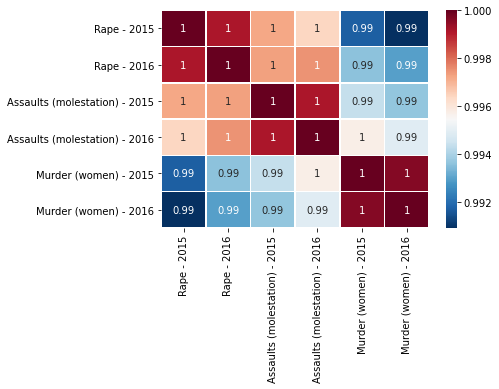

In [ ]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [ ]:
List1 = df['Rape - 2016']
List2 = df['Rape - 2016']

In [ ]:
corr = stats.pearsonr(List1,List2)
corr

(1.0, 0.0)

In [ ]:
List1 = df['Rape - 2016']
List2 = df['Rape - 2015']

In [ ]:
corr = stats.pearsonr(List1,List2)
corr

(0.9991513157509662, 7.289595258548006e-53)

In [ ]:
List1 = df['Rape - 2016']
List2 = df['Assaults (molestation) - 2016']

In [ ]:
corr = stats.pearsonr(List1,List2)
print('Correlation between Rape - 2016 and Assaults (molestation) - 2016\n',corr)

Correlation between Rape - 2016 and Assaults (molestation) - 2016
 (0.9975069138306321, 3.2704442077473924e-44)


# PCA

In [ ]:
da = pd.read_csv('Rapes_Assaults.csv',  encoding='utf-8')
da.head(10)

,States/UTs,Rape - 2015,Rape - 2016,Assaults (molestation) - 2015,Assaults (molestation) - 2016,Murder (women) - 2015,Murder (women) - 2016
0,Andhra Pradesh,1027,994,4616,4829,428,411
1,Arunachal Pradesh,71,92,101,109,9,11
2,Assam,1733,1779,4293,3378,185,220
3,Bihar,1041,1008,198,324,340,318
4,Chhattisgarh,1560,1626,1868,1770,338,347
5,Goa,86,61,150,143,11,16
6,Gujarat,503,982,1164,1224,269,288
7,Haryana,1070,1187,1886,1860,197,226
8,Himachal Pradesh,244,252,434,410,25,28
9,Jammu & Kashmir,296,256,1343,1235,19,24


In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['Rape - 2015', 'Rape - 2016', 'Assaults (molestation) - 2015', 'Assaults (molestation) - 2016','Murder (women) - 2015','Murder (women) - 2016']
x = da.loc[:, features].values
print(x[:3])
y = da.loc[:,['States/UTs']].values
x = StandardScaler().fit_transform(x)
print(x[:3])
x.shape

[[1027  994 4616 4829  428  411]
 [  71   92  101  109    9   11]
 [1733 1779 4293 3378  185  220]]
[[-0.22550639 -0.24409608 -0.09972094 -0.09411245 -0.11764675 -0.13077944]
 [-0.35708354 -0.35407766 -0.36085775 -0.356971   -0.35263827 -0.3511466 ]
 [-0.12833748 -0.1483804  -0.11840249 -0.17491918 -0.25393062 -0.23600476]]


(39, 6)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head(10)

,principal component 1,principal component 2,principal component 3
0,-0.372248,0.078410,0.122156
1,-0.870705,0.005242,-0.004425
2,-0.432681,-0.120037,0.021060
3,-0.618701,0.099880,-0.145878
4,-0.480356,0.021848,-0.110874
5,-0.867894,0.006931,-0.001738
6,-0.629896,0.088166,-0.047281
7,-0.586718,-0.010134,-0.037282
8,-0.830823,-0.007894,-0.004990
9,-0.789724,-0.030123,0.047237


# Regression Analysis

In [ ]:
X = df[['Rape - 2015', 'Rape - 2016', 'Assaults (molestation) - 2015', 'Assaults (molestation) - 2016','Murder (women) - 2015']].values.reshape(-1,5)
y = df['Murder (women) - 2016'].values.reshape(-1,1)

In [ ]:
X

array([[ 1027,   994,  4616,  4829,   428],
       [   71,    92,   101,   109,     9],
       [ 1733,  1779,  4293,  3378,   185],
       [ 1041,  1008,   198,   324,   340],
       [ 1560,  1626,  1868,  1770,   338],
       [   86,    61,   150,   143,    11],
       [  503,   982,  1164,  1224,   269],
       [ 1070,  1187,  1886,  1860,   197],
       [  244,   252,   434,   410,    25],
       [  296,   256,  1343,  1235,    19],
       [ 1053,  1109,   844,   667,   137],
       [  589,  1655,  5112,  5260,   574],
       [ 1256,  1656,  3987,  4029,    97],
       [ 4391,  4882,  8049,  8717,   656],
       [ 4144,  4189, 11713, 11396,   780],
       [   46,    55,    84,    65,    16],
       [   93,   190,    95,    68,    23],
       [   58,    23,    75,    71,    11],
       [   35,    26,     8,    14,    12],
       [ 2251,  1983,  6499,  8252,   666],
       [  886,   838,  1123,  1025,   194],
       [ 3644,  3656,  4813,  4839,   224],
       [    5,    92,    21,    

In [ ]:
y

array([[ 411],
       [  11],
       [ 220],
       [ 318],
       [ 347],
       [  16],
       [ 288],
       [ 226],
       [  28],
       [  24],
       [ 174],
       [ 547],
       [  99],
       [ 645],
       [ 756],
       [  18],
       [  11],
       [  13],
       [   9],
       [ 591],
       [ 201],
       [ 238],
       [   7],
       [ 468],
       [ 311],
       [  64],
       [1217],
       [  47],
       [ 983],
       [8288],
       [   6],
       [   3],
       [   1],
       [   0],
       [ 123],
       [   0],
       [   8],
       [ 141],
       [8429]])

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model = LinearRegression().fit(X,y)

In [ ]:
r_sq = model.score(X,y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.999355705930246


In [ ]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: [-0.83319979]
slope: [[-0.04016066  0.03968845  0.01991858 -0.02655982  1.07282619]]


In [ ]:
y_pred = model.predict(X)

In [ ]:
de = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
de

,Actual,Predicted
0,411,420.228525
1,11,8.738922
2,220,194.438362
3,318,357.464908
4,347,353.861864
5,16,9.124800
6,288,297.206297
7,226,202.817018
8,28,23.944880
9,24,11.772461


In [ ]:
import plotly.express as px
fig = px.scatter(de, x="Actual", y="Predicted", color='Predicted', marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
print('MSE:', metrics.mean_squared_error(y, y_pred))

MSE: 2122.806211214413


In [ ]:
from sklearn.metrics import r2_score
print("R**2 Value:\ncoefficient of determination:", r2_score(y, y_pred))

R**2 Value:
coefficient of determination: 0.999355705930246
